### **The Question**: Do people in different countries of residence exhibit different trends regarding CO2 emissions, ecoglogical footprint, and ecological footprint composition (e.g., Food, Shelter, Goods, etc.)

In [1]:
# Reading in the spreadsheet
import pandas as pd
import matplotlib.pyplot as plt

eco_df = pd.read_csv(
    "https://ethomas.greenriverdev.com/SDEV280/EcologicalSurveyData.csv"
)
eco_df

,Name,Gender,Age,Country Currently Residing In,Country of Birth,Personal Earth Overshoot Day,Number of Earths,Ecological Footprint,CO2 Emissions - tonnes,Carbon Footprint %,Food - gha,Shelter - gha,Mobility - gha,Goods - gha,Service - gha
0,F Z,Male,87,USA,USA,21-Mar,4.5,7.4,11.1,54.0,2.2,3.6,0.6,0.0,1.0
1,L J,Female,73,USA,USA,14-Jun,2.2,3.6,6.0,57.0,0.7,2.1,0.0,0.1,0.6
2,S M,Female,62,USA,USA,11-Mar,5.2,8.4,15.2,62.0,2.1,1.0,2.9,1.1,1.3
3,B B,Male,61,USA,USA,14-May,2.7,4.4,7.4,58.0,0.8,1.9,0.6,0.3,0.8
4,D S,Female,52,USA,USA,28-Apr,3.1,4.5,7.7,58.0,0.7,2.0,0.9,0.1,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,K O,Female,10,USA,United States,4-Apr,3.0,5.2,8.3,52.0,1.2,1.5,0.4,0.7,0.8
95,T O,Male,10,USA,United States,5-May,2.9,4.8,6.1,44.0,2.3,0.7,0.3,0.6,0.8
96,M K,Female,64,USA,Ukraine,23-Mar,4.4,7.2,10.9,52.0,2.2,1.3,0.7,1.9,1.1
97,D K,Male,66,USA,Ukraine,1-Mar,6.1,9.9,18.5,64.0,2.2,1.3,4.0,1.2,1.2


In [2]:
# Grouping by country of residence (due to lack of sample size)
# eco_df.groupby("Country Currently Residing In").describe()
eco_df.groupby("Country Currently Residing In").mean()

/var/folders/9b/3ks0lnqn6_31vrygxf7gx0q80000gn/T/ipykernel_62424/1881919571.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  eco_df.groupby("Country Currently Residing In").mean()


,Age,Number of Earths,Ecological Footprint,CO2 Emissions - tonnes,Carbon Footprint %,Food - gha,Shelter - gha,Mobility - gha,Goods - gha,Service - gha
Country Currently Residing In,,,,,,,,,,
Egypt,24.00000,9.400000,15.400000,27.600000,62.000000,2.900000,4.200000,4.00000,1.700000,2.500000
Italy,25.00000,7.400000,12.000000,20.800000,60.000000,2.900000,3.200000,2.80000,1.000000,2.100000
Jordan,21.50000,6.500000,10.550000,18.550000,62.000000,1.950000,2.350000,2.85000,1.400000,2.000000
Lebanon,23.00000,4.400000,7.100000,11.100000,54.000000,1.600000,2.400000,0.90000,1.000000,1.200000
Spain,22.00000,6.700000,10.900000,20.800000,66.000000,0.800000,6.100000,2.20000,0.100000,1.700000
UAE,24.54902,6.582353,10.656863,18.386275,60.318182,2.123529,2.745098,2.32549,1.529412,1.798039
UK,21.00000,5.700000,9.300000,19.000000,63.500000,1.400000,3.100000,3.10000,0.900000,2.450000
USA,35.52500,5.137500,8.370000,14.892500,59.950000,1.812500,2.536500,1.69525,1.040000,1.200000


In [3]:
# setting max number of digits after decimal point to 2
pd.set_option("display.precision", 2)

# creating dataframe with only UAE and USA (other countries have too low sample sizes)
restricted_df = eco_df[
    ~(
        eco_df["Country Currently Residing In"].isin(
            ["Egypt", "Italy", "Jordan", "Lebanon", "Spain", "UK"]
        )
    )
]

restricted_df.tail(20)

,Name,Gender,Age,Country Currently Residing In,Country of Birth,Personal Earth Overshoot Day,Number of Earths,Ecological Footprint,CO2 Emissions - tonnes,Carbon Footprint %,Food - gha,Shelter - gha,Mobility - gha,Goods - gha,Service - gha
79,R A,Male,20,UAE,NaN,8-Feb,9.4,15.3,29.6,NaN,1.7,2.4,5.10,1.5,2.4
80,A A,Female,19,UAE,NaN,24-Jan,15.6,25.5,45.5,NaN,2.3,9.8,7.10,1.5,4.7
81,K A,Female,44,UAE,NaN,4-Mar,5.9,9.6,17.5,NaN,2.0,1.4,4.20,0.9,1.9
82,H A,Male,19,UAE,NaN,19-Feb,7.4,12.1,21.8,NaN,2.4,4.6,1.30,2.1,1.6
83,H A,Male,17,UAE,NaN,3-Feb,10.8,17.6,32.2,NaN,1.3,3.9,5.90,2.9,3.6
84,N L,Male,18,UAE,NaN,6-Apr,3.8,6.2,11.2,NaN,1.0,1.3,0.80,2.2,1.0
85,J A,Male,18,UAE,NaN,15-Feb,8.0,10.6,22.7,NaN,2.3,0.8,3.40,2.3,1.7
86,J A,Male,19,UAE,NaN,28-Feb,6.3,16.1,16.7,NaN,1.8,3.4,3.90,2.2,2.5
87,A L,Female,22,UAE,NaN,6-Mar,7.4,12.4,18.1,NaN,2.0,3.8,4.70,2.8,3.7
88,M A,Male,27,UAE,NaN,13-Feb,5.0,7.3,10.4,NaN,1.2,2.6,0.90,1.6,2.0


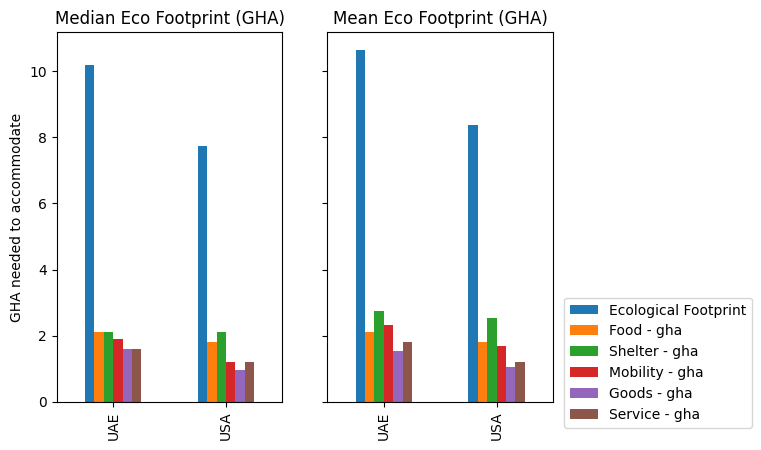

In [4]:
# Showing mean and median values across Ecological Footprint and its composition
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True)

# using mean for values
eco_groupby_mean = restricted_df.groupby("Country Currently Residing In").mean(
    numeric_only=True
)[
    [
        "Ecological Footprint",
        "Food - gha",
        "Shelter - gha",
        "Mobility - gha",
        "Goods - gha",
        "Service - gha",
    ]
]

# using median for values
eco_groupby_median = restricted_df.groupby("Country Currently Residing In").median(
    numeric_only=True
)[
    [
        "Ecological Footprint",
        "Food - gha",
        "Shelter - gha",
        "Mobility - gha",
        "Goods - gha",
        "Service - gha",
    ]
]

eco_groupby_median.plot(
    title="Median Eco Footprint (GHA)",
    kind="bar",
    xlabel="",
    ylabel="GHA needed to accommodate",
    ax=axes[0],
).legend().remove()
eco_groupby_mean.plot(
    title="Mean Eco Footprint (GHA)",
    kind="bar",
    xlabel="",
    ylabel="GHA needed to accommodate",
    ax=axes[1],
    
).legend(bbox_to_anchor=(1.02, 0.3))



<bound method NDFrame.describe of Country Currently Residing In
UAE    18.1
USA    13.6
Name: CO2 Emissions - tonnes, dtype: float64>

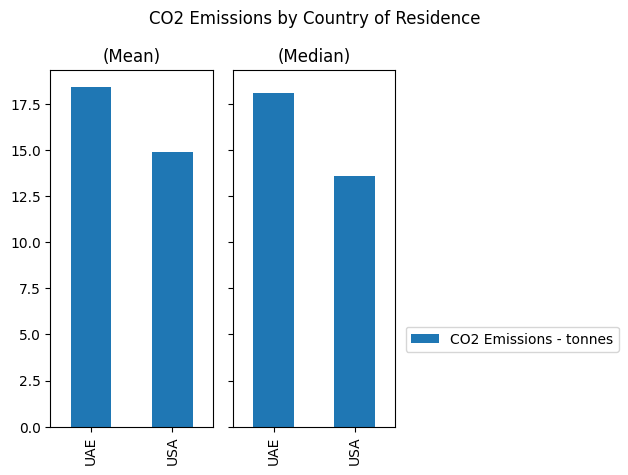

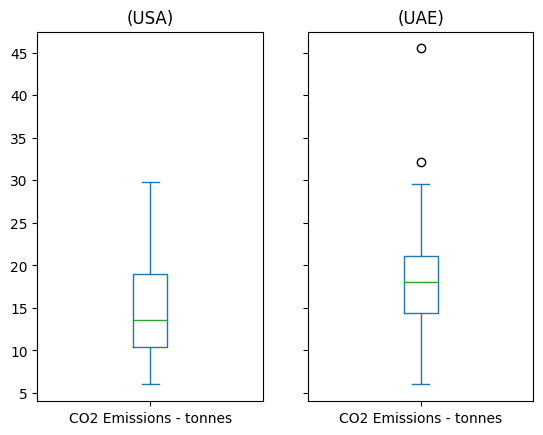

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True)
fig2, axes2 = plt.subplots(nrows=1, ncols=2, sharey=True)

# C02 Emmissions per country of residence (mean)
carbon_groupby_mean = restricted_df.groupby("Country Currently Residing In").mean(
    numeric_only=True
)["CO2 Emissions - tonnes"]

carbon_groupby_mean.plot(
    title="(Mean)",
    kind="bar",
    ylabel="",
    xlabel="",
    ax=axes[0],
).legend().remove()

# C02 Emmissions per country of residence (median)
carbon_groupby_median = restricted_df.groupby("Country Currently Residing In").median(
    numeric_only=True
)["CO2 Emissions - tonnes"]

carbon_groupby_median.plot(
    title="(Median)",
    kind="bar",
    ylabel="",
    xlabel="",
    ax=axes[1],
).legend(bbox_to_anchor=(1.02, 0.3))

# creating box and whisker plots for same data
restricted_df_carbon_usa = restricted_df[
    restricted_df["Country Currently Residing In"] == "USA"
]
restricted_df_carbon_uae = restricted_df[
    restricted_df["Country Currently Residing In"] == "UAE"
]
restricted_df_carbon_usa["CO2 Emissions - tonnes"].plot(
    kind="box", ax=axes2[0], title="(USA)", ylabel=""
)
restricted_df_carbon_uae["CO2 Emissions - tonnes"].plot(
    kind="box", ax=axes2[1], title="(UAE)"
)

fig.suptitle("CO2 Emissions by Country of Residence")
fig.tight_layout()
carbon_groupby_median.describe